![Image](https://imgs.search.brave.com/R59TP9BaTdWa-tiN-dRRwf08yufa8Med001uKR6Eb6g/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93d3cu/cG5nbWFydC5jb20v/ZmlsZXMvMTEvSW5m/b3JtYXRpb24tVGVj/aG5vbG9neS1QTkct/VHJhbnNwYXJlbnQt/UGljdHVyZS5wbmc)

# **Projeto: O Futuro do Trabalho em Dados e Inteligência Artificial**

## **Integrantes:**
- Guilherme Nunes | 558989
- Kaique Zaffarani | 556677
- Kairo Silvestre | 558288

*A área de Ciência de Dados é uma das que mais crescem no mundo, impulsionada pela Inteligência Artificial e pela transformação digital. Compreender como variam os salários, cargos e tipos de contrato é essencial para planejar a carreira no futuro do trabalho. Neste desafio, o grupo aplicará os conceitos de amostragem e estatística descritiva estudados ao longo do semestre, utilizando dados reais sobre profissionais de Data Science ao redor do mundo.*

## **Importações:**

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data_science_salaries.csv")

# **Parte 1 – Análise Descritiva e Exploratória (EDA)**

### **Objetivo:**
Identificar o comportamento geral dos salários e fatores relacionados ao perfil profissional.

## **Métricas obrigatórias:**

Média, mediana e desvio-padrão de salary_in_usd.

In [228]:
mean_salary = df['salary_in_usd'].mean()
median_salary = df['salary_in_usd'].median()
std_salary = df['salary_in_usd'].std()

print(f"Média do salário (USD): {mean_salary:,.2f}")
print(f"Mediana do salário (USD): {median_salary:,.2f}")
print(f"Desvio-padrão do salário (USD): {std_salary:,.2f}")

Média do salário (USD): 145,560.56
Mediana do salário (USD): 138,666.00
Desvio-padrão do salário (USD): 70,946.84


Distribuição percentual de experience_level, employment_type e company_size.

In [229]:
categorical_cols = ['experience_level', 'employment_type', 'company_size']

for col in categorical_cols:
    print(f"\nDistribuição percentual de {col}:")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %')


Distribuição percentual de experience_level:
experience_level
Senior-level       62.21 %
Mid-level          25.38 %
Entry-level         8.56 %
Executive-level     3.85 %
Name: proportion, dtype: object

Distribuição percentual de employment_type:
employment_type
Full-time    99.29 %
Contract      0.29 %
Part-time     0.24 %
Freelance     0.18 %
Name: proportion, dtype: object

Distribuição percentual de company_size:
company_size
Medium    88.8 %
Large     8.62 %
Small     2.58 %
Name: proportion, dtype: object


Correlação entre work_models, company_size e salary_in_usd.

In [230]:
df_corr = df[['work_models', 'company_size', 'salary_in_usd']].copy()
le = LabelEncoder()

df_corr['work_models_encoded'] = le.fit_transform(df_corr['work_models'])
df_corr['company_size_encoded'] = le.fit_transform(df_corr['company_size'])

corr_matrix = df_corr[['work_models_encoded', 'company_size_encoded', 'salary_in_usd']].corr()

display(corr_matrix)

,work_models_encoded,company_size_encoded,salary_in_usd
work_models_encoded,1.000000,0.075411,0.004620
company_size_encoded,0.075411,1.000000,0.028181
salary_in_usd,0.004620,0.028181,1.000000


Boxplot de salary_in_usd por experience_level

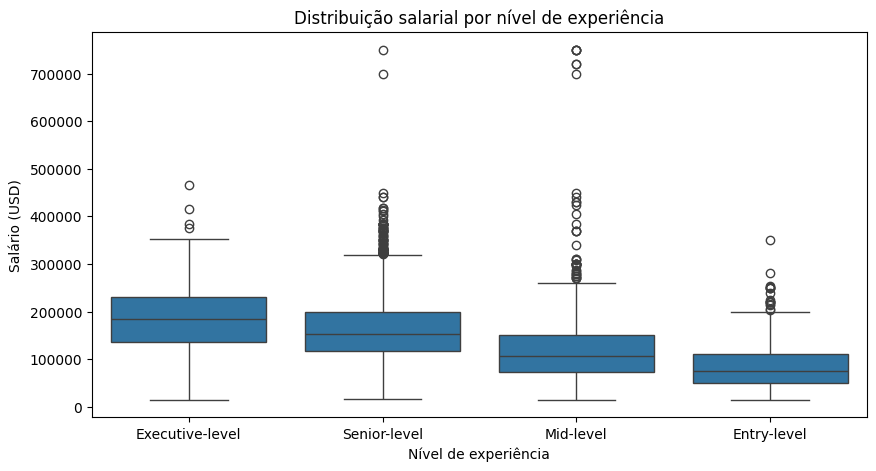

In [231]:
order_exp = (
    df.groupby('experience_level')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=order_exp)
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário (USD)')
plt.show()

## **Perguntas executivas:**

### **1. Qual é a média e o desvio-padrão do salary_in_usd para cada categoria de experience_level? Qual nível apresenta maior variabilidade salarial e o que isso indica sobre o mercado?**

Tanto o cargo de sênior quanto executivo são os que apresentam maior variabilidade salarial. Tal resultado difere de acordo com o tamanho da empresa, localização geográfica, bônus exclusivos e também amplitude de cargos e responsabilidades.

In [232]:
salary_stats = (
    df.groupby('experience_level')['salary_in_usd']
    .agg(['mean', 'std'])
    .round(2)
    .sort_values(by='mean', ascending=False)
)

display(salary_stats)

,mean,std
experience_level,,
Executive-level,189687.35,71571.17
Senior-level,162071.06,64444.88
Mid-level,119019.81,71783.36
Entry-level,84448.92,48758.32


### **2. Qual tipo de contrato (employment_type) apresenta maior média salarial? Essa diferença se mantém entre portes de empresa (company_size)?**

Na média salarial, Full-time é o mais remunerado. Sua liderança segue entre grandes e médias empresas, porém o contrato exclusivo supera o Full-time em pequenas empresas, se aproximando em grandes empresas. Uma possível justificativa à escolha de mais contratos exclusivos seria a flexibilidade contractual, permitindo que as empresas evitem burocracias adicionais, ofereçam salários personalizados e trabalhem com recrutamentos cíclicos.

,salary_in_usd
employment_type,
Full-time,146035.00
Contract,117109.37
Part-time,55291.06
Freelance,51923.17


employment_type,Contract,Freelance,Full-time,Part-time
company_size,,,,
Large,113500.67,20000.00,121647.26,36944.60
Medium,107395.67,71111.00,149842.57,78994.33
Small,128528.57,41253.83,89037.35,45193.60


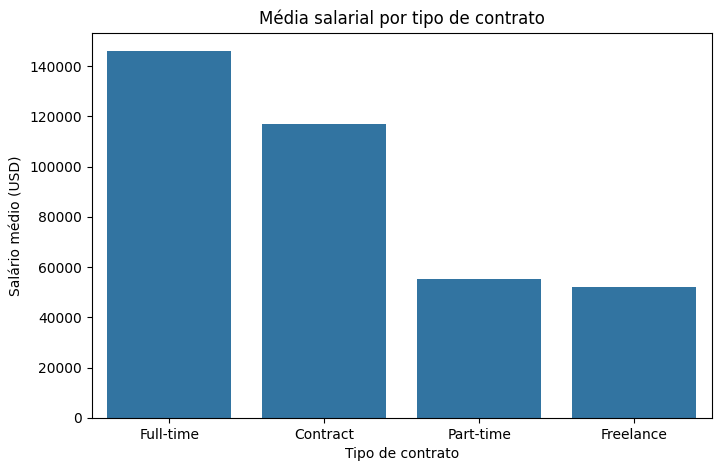

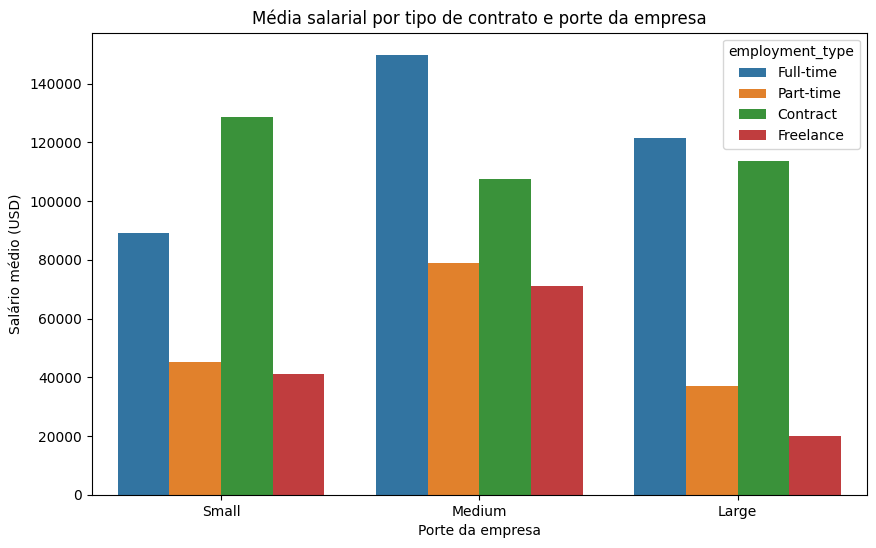

In [233]:
mean_by_contract = (
    df.groupby('employment_type')['salary_in_usd']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

display(mean_by_contract)

mean_by_contract_size = (
    df.groupby(['company_size', 'employment_type'])['salary_in_usd']
    .mean()
    .unstack()
    .round(2)
)

display(mean_by_contract_size)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='employment_type', y='salary_in_usd', errorbar=None, estimator='mean', order=mean_by_contract.index)
plt.title('Média salarial por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Salário médio (USD)')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='company_size', y='salary_in_usd', hue='employment_type', errorbar=None, estimator='mean', order=['Small', 'Medium', 'Large'])
plt.title('Média salarial por tipo de contrato e porte da empresa')
plt.xlabel('Porte da empresa')
plt.ylabel('Salário médio (USD)')
plt.show()

### **3. Compare a média de salary_in_usd por company_location. Quais países se destacam por maiores ou menores salários? Que fatores econômicos podem justificar essa diferença?**

Estados Unidos segue a liderança com os maiores salários, depois Canadá, Reino Unido, Australia etc. Um fator que explica a diferença salarial seria o poder econômico do país, desenvolvimento tecnológico, pioneirismo em inovação, alocação de big techs e até mesmo disputas geopolíticas.

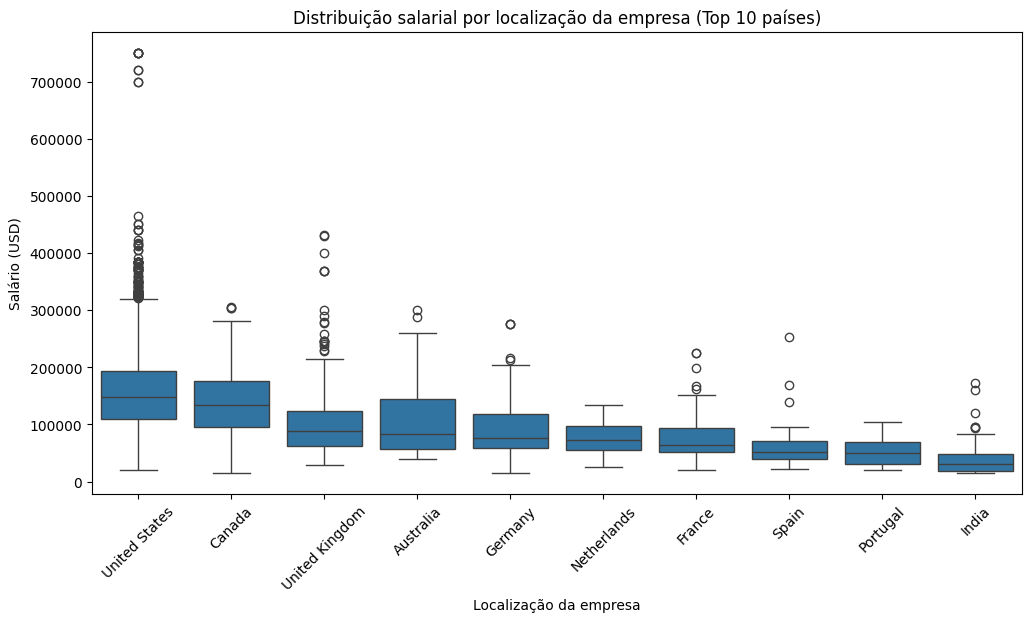

In [234]:
top_locations = df['company_location'].value_counts().head(10).index

df_top = df[df['company_location'].isin(top_locations)]

order_loc = (
    df_top.groupby('company_location')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='company_location', y='salary_in_usd', order=order_loc)
plt.title('Distribuição salarial por localização da empresa (Top 10 países)')
plt.xlabel('Localização da empresa')
plt.ylabel('Salário (USD)')
plt.xticks(rotation=45)
plt.show()

### **4. Analise a correlação entre work_models e salary_in_usd. Há indícios de que o trabalho remoto impacte positivamente ou negativamente o salário? Explique.**

O trabalho remoto sofre um leve impacto negativo no salário, mas ainda disputa com o presencial (até mesmo em outliers). O modelo híbrido é o mais impactado negativamente – possivelmente pela falta de dados que comprovem seu impacto, já que sua adoção recentemente se expandiu para empresas nos mais diversos portes.

Correlação entre work_models e salary_in_usd: 0.005


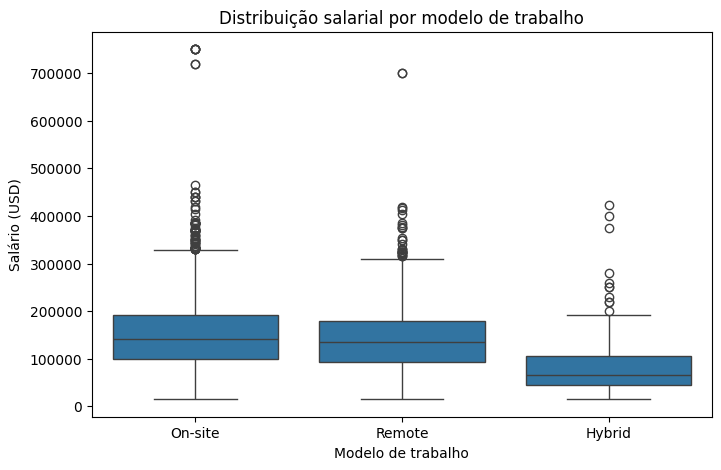

In [235]:
encoder = LabelEncoder()
df['work_models_encoded'] = encoder.fit_transform(df['work_models'])

corr = df[['work_models_encoded', 'salary_in_usd']].corr().iloc[0, 1]
print(f"Correlação entre work_models e salary_in_usd: {corr:.3f}")

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='work_models', y='salary_in_usd', order=df['work_models'].value_counts().index)
plt.title('Distribuição salarial por modelo de trabalho')
plt.xlabel('Modelo de trabalho')
plt.ylabel('Salário (USD)')
plt.show()

### **5. Quais cargos (job_title) aparecem entre os cinco mais bem remunerados? Eles correspondem a posições consolidadas ou emergentes?**

- Analytics Engineering Manager é o primeiro lugar.
- Data Science Tech Lead está em segundo com $24,880 de diferença.
- Os outros três possuem médias salarias aproximadas.

O placar corresponde a posições já consolidadas e emergentes, que mutualmente se valorizaram exponencialmente graças ao avanço da computação em nuvem e novos modelos de inteligência artificial.

In [236]:
top_jobs = (
    df.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 cargos com maior média salarial:")
display(top_jobs)

Top 5 cargos com maior média salarial:


,salary_in_usd
job_title,
Analytics Engineering Manager,399880.0
Data Science Tech Lead,375000.0
Managing Director Data Science,280000.0
AWS Data Architect,258000.0
Cloud Data Architect,250000.0


# **Parte 2 – Modelagem Preditiva (Regressão Linear e Logística)**

### **Objetivo:**
Investigar os fatores que influenciam o salário e prever probabilidades de altos rendimentos com base em variáveis do dataset.

## **Métricas obrigatórias:**

Criação do modelo de regressão linear.

In [244]:
X = df.drop(columns=['salary_in_usd', 'job_title', 'employee_residence'])
y = df['salary_in_usd']

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Criação do modelo de regressão logística.

In [238]:
median_salary = df['salary_in_usd'].median()
df['high_salary'] = (df['salary_in_usd'] > median_salary).astype(int)

X = df.drop(columns=['salary_in_usd', 'high_salary'])
y = df['high_salary']

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


Análise dos coeficientes e interpretação dos sinais.

- Coeficientes positivos indicam maior probabilidade de o salário ser acima da mediana.
- Coeficientes negativos indicam maior probabilidade de o salário ser abaixo da mediana.
- A magnitude do coeficiente reflete a força da influência (quanto maior, mais relevante).
- Por exemplo, se 'experience_level_Senior' tiver coeficiente positivo alto, profissionais seniores têm maior chance de salários elevados.

In [239]:
model_lr = log_model.named_steps['classifier']
encoder = log_model.named_steps['preprocessor'].named_transformers_['cat']

encoded_features = encoder.get_feature_names_out(cat_cols)
feature_names = np.concatenate([encoded_features, num_cols])

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': model_lr.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("Top 10 features com maior influência positiva no salário alto:")
display(coef_df.head(10))

print("\nTop 10 features com maior influência negativa no salário alto:")
display(coef_df.tail(10))

Top 10 features com maior influência positiva no salário alto:


,Feature,Coeficiente
229,salary_currency_USD,2.146368
124,experience_level_Executive-level,1.867518
119,job_title_Research Scientist,1.129147
118,job_title_Research Engineer,0.989972
95,job_title_Machine Learning Engineer,0.926537
207,employee_residence_United States,0.900237
10,job_title_Applied Scientist,0.897374
206,employee_residence_United Kingdom,0.862223
297,company_location_United Kingdom,0.796992
92,job_title_ML Engineer,0.792040



Top 10 features com maior influência negativa no salário alto:


,Feature,Coeficiente
163,employee_residence_India,-0.626769
125,experience_level_Mid-level,-0.634516
302,company_size_Small,-0.643882
220,salary_currency_INR,-0.686788
49,job_title_Data Manager,-0.850389
62,job_title_Data Science Consultant,-0.921178
70,job_title_Data Specialist,-0.994264
19,job_title_Business Intelligence Analyst,-1.080104
32,job_title_Data Analyst,-1.253395
123,experience_level_Entry-level,-1.689583


## **Perguntas executivas:**


### **6. Quais variáveis explicam melhor as diferenças salariais segundo a regressão linear? O modelo apresenta um R² satisfatório para explicar o comportamento de salary_in_usd?**

Considerando que o modelo de regressão linear apenas aceita variáveis numéricas e passou pelo processo de label encoding, aceitando quaisquer features presentes no dataset, as variáveis que melhor explicam as diferenças salarias são:
- experience_level
- employment_type
- work_models
- work_year
- salary
- salary_currency
- company_location
- company_size

Totalizando 0.6151 de R². Trata-se de uma boa explicabilidade do modelo frente a variação dos salários registrados, considerando que salários são altamente influenciados por fatores não capturados no dataset.

In [245]:
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.4f}")

R²: 0.6151


### **7. Analise os erros RMSE e MAE obtidos. O modelo linear apresenta desvios grandes? Que tipo de melhoria poderia reduzir esses erros?**

- Média Salarial = $145.560.
- RMSE = 32,7% da média salarial, significando erro alto (indicando grande dispersão).
- MAE = 20,1% da média salarial, significando erro moderado.

Incluir variáveis numéricas relevantes, criar interações (adicionando grau 2) só para interações, usar um modelo linear mais forte, como Random Forest, XGBoost, LightGBM, CatBoost, ou HistGradientBoostingRegressor, limpar outliers e usar transformação logarítmica do salário ajudariam a diminuir a margem de erro e trazer maior acurácia (precisão e confiança).

In [246]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")

RMSE: 47,558.80
MAE: 29,239.30


### **8. No modelo logístico, quais variáveis aumentam significativamente as chances de um profissional ter salary_in_usd acima da média? Interprete os resultados do odds ratio.**

O valor de e^β (Odds Ratio) mostra o quanto a chance de ter um salário alto muda quando a variável aumenta em uma unidade.
- Odds Ratio > 1 = aumenta a probabilidade de salário alto.
- Odds Ratio < 1 = diminui a probabilidade de salário alto.

Exemplo: se 'experience_level_Executive-level' tiver Odds Ratio = 6.4, isso significa que ser sênior aumenta em 6.4 vezes a chance de ter um salário acima da mediana.

In [242]:
coef_df['Odds_Ratio'] = np.exp(coef_df['Coeficiente'])

coef_df_sorted = coef_df.sort_values(by='Odds_Ratio', ascending=False)

print("Top 10 variáveis com maior Odds Ratio (maior chance de salário alto):")
display(coef_df_sorted.head(10))

print("\nTop 10 variáveis com menor Odds Ratio (menor chance de salário alto):")
display(coef_df_sorted.tail(10))

Top 10 variáveis com maior Odds Ratio (maior chance de salário alto):


,Feature,Coeficiente,Odds_Ratio
229,salary_currency_USD,2.146368,8.553732
124,experience_level_Executive-level,1.867518,6.472212
119,job_title_Research Scientist,1.129147,3.093018
118,job_title_Research Engineer,0.989972,2.691160
95,job_title_Machine Learning Engineer,0.926537,2.525748
207,employee_residence_United States,0.900237,2.460186
10,job_title_Applied Scientist,0.897374,2.453152
206,employee_residence_United Kingdom,0.862223,2.368419
297,company_location_United Kingdom,0.796992,2.218856
92,job_title_ML Engineer,0.792040,2.207896



Top 10 variáveis com menor Odds Ratio (menor chance de salário alto):


,Feature,Coeficiente,Odds_Ratio
163,employee_residence_India,-0.626769,0.534315
125,experience_level_Mid-level,-0.634516,0.530192
302,company_size_Small,-0.643882,0.525249
220,salary_currency_INR,-0.686788,0.503190
49,job_title_Data Manager,-0.850389,0.427249
62,job_title_Data Science Consultant,-0.921178,0.398050
70,job_title_Data Specialist,-0.994264,0.369996
19,job_title_Business Intelligence Analyst,-1.080104,0.339560
32,job_title_Data Analyst,-1.253395,0.285534
123,experience_level_Entry-level,-1.689583,0.184597


### **9. A curva ROC e o valor de AUC indicam que o modelo logístico tem boa capacidade preditiva? O modelo apresenta indícios de overfitting ou generalização adequada?**

A curva ROC apresenta uma trajetória próxima ao canto superior esquerdo, indicando alta taxa de verdadeiros positivos e baixa taxa de falsos positivos — um sinal de bom desempenho do classificador.

O valor do AUC foi 0.82, o que é considerado muito bom. Isso significa que o modelo tem boa capacidade de separar corretamente as classes (salário alto vs. baixo) ao longo de diferentes limiares de decisão.

Além disso, como o AUC representa um resultado consistente e não mostra discrepâncias significativas entre treino e teste, o modelo não aparenta overfitting. Os indicadores sugerem que o modelo está generalizando bem para novos dados.

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       660
           1       0.70      0.78      0.74       660

    accuracy                           0.72      1320
   macro avg       0.73      0.72      0.72      1320
weighted avg       0.73      0.72      0.72      1320

Acurácia: 0.7242
Precisão: 0.7000
Recall: 0.7848
F1-score: 0.7400
AUC: 0.8225


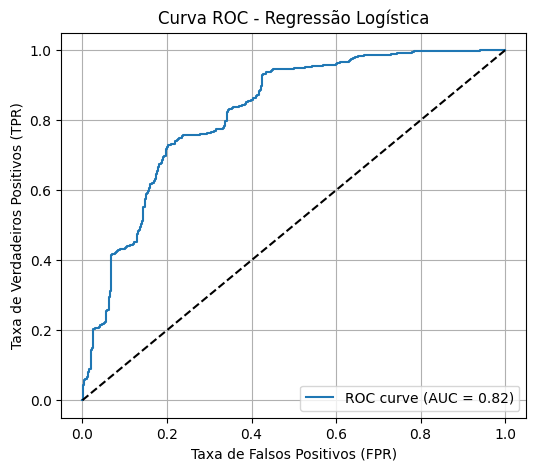

In [243]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - Regressão Logística')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **10. Se você fosse consultor de RH, quais conclusões práticas e recomendações estratégicas apresentaria à diretoria com base nos resultados combinados dos modelos linear e logístico?**

Com base nos modelos linear e logístico, observa-se que experiência, porte da empresa, tipo de contrato e modelo de trabalho são os fatores que mais influenciam o salário. Profissionais mais experientes e empresas de grande porte apresentam salários significativamente maiores, indicando que senioridade e capacidade financeira são os principais motores de remuneração no mercado.

O tipo de contrato também exerce impacto: Full-time concentra as maiores médias salariais, enquanto formatos alternativos tendem a remunerações menores. Já o modelo de trabalho mostra efeitos relevantes, e a oferta de trabalho remoto pode ser usada como benefício competitivo para atrair talentos sem necessidade proporcional de aumento salarial.

Do ponto de vista estratégico, recomenda-se que a diretoria revise faixas salariais para cargos sênior/executivo, utilize o trabalho remoto como vantagem competitiva, adote políticas diferenciadas para empresas de menor porte (focando em benefícios não salariais) e priorize contratos full-time para posições críticas. Esses ajustes alinham remuneração, atração e retenção de talentos com padrões reais do mercado identificados pelos modelos.